In [1]:
import pandas as pd
pd.set_option("display.width", 380)
pd.set_option('max_colwidth', 200)

from langdetect import detect

from IPython.display import display

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#To handle warning
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
df = pd.read_csv("./dataLemmatized.csv", sep=',')

## Distribution of articles over the years
With an average of 73 articles per year for a standard deviation of 18, there is a difference between years, but it is reasonable.

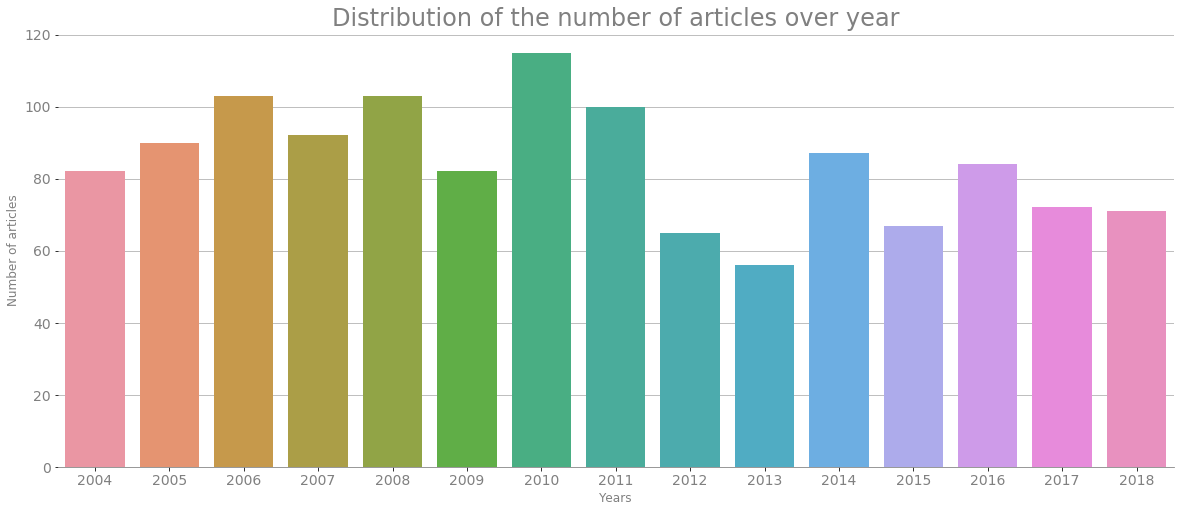

Grand total of 1269 articles


In [3]:
invYr = df.groupby(['year']).count()
sns.barplot(x=invYr.index, y=invYr.series)
plt.title("Distribution of the number of articles over year", fontsize= 24, color='gray')
plt.ylabel("Number of articles", fontsize=12, color='gray')
plt.xlabel("Years", fontsize=12, color='gray')
fig=plt.gcf()
fig.set_size_inches(20,8)

## PlotSwagg ##
plt.yticks(fontsize=14, rotation=0, color='gray')
plt.xticks(fontsize=14, rotation=0, color='gray')

# Less border
plt.gca().yaxis.grid(True)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_edgecolor('gray')

# line under the bar
plt.gca().set_axisbelow(True)

plt.show()
print("Grand total of %d articles" % len(df))

## Language used in the articles

In [4]:
df['lng_title'] = df['title'].apply( lambda x : detect(x))
df['lng_abstract'] = df['abstract'].apply( lambda x : detect(x) if x is not pd.np.nan else pd.np.nan)

In [5]:
display(df[['title', 'abstract', 'lng_title', 'lng_abstract']].head(10))
print("French  title: {}\nEnglish title {}\n\nFrench  abstract {}\nEnglish abstract {}".format(
   len(df[df['lng_title'] == 'fr']), 
   len(df[df['lng_title'] == 'en']) ,
   len(df[df['lng_abstract'] == 'fr']) ,
   len(df[df['lng_abstract'] == 'en'])))


,title,abstract,lng_title,lng_abstract
0,#Idéo2017 : une plateforme citoyenne dédiée à l'analyse des tweets lors des événements politiques,"Cette plateforme a pour objectif de permettre aux citoyens d'analyserpar eux-mêmes les tweets politiques lors d'événements spécifiques en France.Pour le cas de l'élection présidentielle de 2017, #...",fr,fr
1,A two level co-clustering algorithm for very large data sets,La classification croisée (co-clustering) est une technique qui permet d'extraire la structuresous-jacente existante entre les lignes et les colonnes d'une table de données sous forme de blocs. Pl...,en,fr
2,ALGeoSPF: Un modèle de factorisation basé sur du clustering géographique pour la recommandation de POI,La recommandation de points d'intérêts est devenue une caractéristiqueessentielle des réseaux sociaux géo-localisés qui a accompagnél'émergence des échanges massifs de données digitales. Cependant...,fr,fr
3,Analyse des sentiments à partir des commentaires Facebook publiés en Arabe standard ou dialectal marocain par une approche d'apprentissage automatique,"L'analyse des sentiments est un processus pendant lequel la polarité(positive, négative ou neutre) d'un texte donné est déterminée. Nous nous intéressonsdans ce travail à l'analyse des sentiments ...",fr,fr
4,Analyse en rôles sémantiques pour le résumé automatique,Cet article présente une approche visant à extraire les informations expriméesdans un corpus de textes et en produire un résumé. Plusieurs variantes deméthodes extractives de résumé de texte ont é...,fr,fr
5,Analyse Ontologique de scénario dans un contexte Big Data,NaN,fr,NaN
6,Apport de la fouille de données pour la prévention du risque suicidaire,"Avec plus de 800 000 décès par an dans le monde, le suicide est latroisième cause de décès évitable. Il y a 20 fois plus de tentatives, impliquant denombreuses hospitalisations, des coûts humains ...",fr,fr
7,Apport des modèles locaux pour les K-moyennes prédictives,"Dans le cadre du clustering prédictif, pour attribuer la classe aux groupesformés à la fin de la phase d'apprentissage, le vote majoritaire est la méthodecommunément utilisée. Cependant, cette app...",fr,fr
8,Apprendre les relations de préférence et de co-occurrence entre les labels en classification multi-labels,"En classification multi-labels, chaque instance est associée àun ou plusieurs labels. Par exemple, un morceau de musique peut êtreassocié aux labels 'heureux' et 'relaxant'. Des relations de co-oc...",fr,fr
9,Approche contextuelle par régression pour les tests A/B,"Les tests A/B sont des procédures utilisées par les entreprises du webet de la santé entre autres, pour mesurer l'impact d'un changement de versiond'une variable par rapport à un objectif. Bien qu...",fr,fr


French  title: 1134
English title 122

French  abstract 991
English abstract 105


## Lemmatization and tokenization was performed beforehand

In [6]:
# For French
df_fr_title = df[df['lng_title'] == 'fr']
df_fr_abstract = df[df['lng_abstract'] == 'fr']

# Do the French Lem and Prepros
df['lem_prepro_title'] = df['titleLemma']
df['lem_prepro_abstract'] =  df['abstractLemma']

# Display the result
display(df[['lng_title', 'lng_abstract' ,'lem_prepro_title' ,'lem_prepro_abstract']].head())

,lng_title,lng_abstract,lem_prepro_title,lem_prepro_abstract
0,fr,fr,plateforme citoyen dédiée analyser tweets événement politiques,plateforme objectif permettre citoyen analyserpar même tweets politiques événement spécifiques france élection présidentielle analyser quasitemps message candidat fournir principal caractéristique...
1,en,fr,algorithme clustering niveau grand ensemble donnée,classification croisée clustering technique permettre extraire structuresous jacente existante entre ligne colonne tabler donnée forme bloc plusieurs application utiliser technique cependant nombr...
2,fr,fr,algeospf modèle factorisation clustering géographique recommandation,recommandation point intérêt devenir caractéristiqueessentielle réseau sociaux localiser accompagnél émergence échange massif donnée digitale cependantles faible densités point intérêt visiter uti...
3,fr,fr,analyser sentiment partir commentaire facebook publier arabe standard dialectal marocain approche apprentissage automatique,analyser sentiment processus pendant lequel polarité positive négative neutre texte donner déterminée intéressonsdans travail analyser sentiment partir commentairesfacebook réel partager arabe sta...
4,fr,fr,analyser rôle sémantique résumer automatique,article présente approcher viser extraire information expriméesdans corpus texte produire résumer plusieurs variante deméthodes extractives résumer texte implémenter évaluer leurprincipale origina...


## Selection of the feature on which the analysis will be performed

In [7]:
# with ou without the abstract
with_abst = False

def join_with_nan(subset_df):
    res = []
    if subset_df['lem_prepro_title'] is not pd.np.nan:
        res += subset_df['lem_prepro_title'].split()
    if with_abst and subset_df['lem_prepro_abstract'] is not pd.np.nan:
        res += subset_df['lem_prepro_abstract'].split()
    return res

# Join the lematized title and abstract
df_all_lem = df.apply(join_with_nan, axis=1)
display(df_all_lem.head())


0                                                                       [plateforme, citoyen, dédiée, analyser, tweets, événement, politiques]
1                                                                                    [algorithme, clustering, niveau, grand, ensemble, donnée]
2                                                                  [algeospf, modèle, factorisation, clustering, géographique, recommandation]
3    [analyser, sentiment, partir, commentaire, facebook, publier, arabe, standard, dialectal, marocain, approche, apprentissage, automatique]
4                                                                                           [analyser, rôle, sémantique, résumer, automatique]
dtype: object

## Remove Stopwords

In [8]:
import gensim


# Custom Stop words
custom_stop_words = ['algorithme', 'étude', 'méthode', 'approche', 'nouvelle', 'algorithme', 'automatique', 'système'
                    'source', 'exemple', 'concevoir', 'ensuite', 'définir', 'effectuer', 'donnée']
df_all_lem = df_all_lem.apply(lambda word_list: [word for word in word_list if word not in custom_stop_words])

## Create the Dictionary and Corpus needed for Topic Modeling
[source](https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24)

In [9]:
# Create Dictionary
id2word = gensim.corpora.Dictionary(df_all_lem)

count = 0
for k, v in id2word.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 analyser
1 citoyen
2 dédiée
3 plateforme
4 politiques
5 tweets
6 événement
7 clustering
8 ensemble
9 grand
10 niveau


## Remove tokens from the dictionary before Topic Modeling

In [10]:
# Filter out tokens that appear in 
id2word.filter_extremes(no_below=3,   # - less than X documents (absolute number)
                        no_above=0.95, # - more than X documents (fraction of total corpus size, not absolute number)
                        keep_n=100)  # - after the above two steps, keep only the first X most frequent tokens.

bow_corpus = [id2word.doc2bow(doc) for doc in df_all_lem]

In [11]:
first_bow_doc = bow_corpus[0]

# Pandas df
display(", ".join(df_all_lem[0]))

# bow representation
for i in range(len(first_bow_doc)):
    print("Word {} (\"{}\") appears {} time.".format(first_bow_doc[i][0],
                                               id2word[first_bow_doc[i][0]],
                                               first_bow_doc[i][1]))

'plateforme, citoyen, dédiée, analyser, tweets, événement, politiques'

Word 0 ("analyser") appears 1 time.
Word 1 ("plateforme") appears 1 time.


## tf-idf

In [12]:
tfidf = gensim.models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
for doc in corpus_tfidf:
    display(doc)
    break

[(0, 0.4786210176392356), (1, 0.8780215951068531)]

## Building the Topic Model

In [13]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=200, id2word=id2word, passes=2,  workers=4)

In [14]:
for idx, topic in lda_model.print_topics(-1)[:5]:
    print('\nTopic: {} \nWords: {}'.format(idx, topic))


Topic: 0 
Words: 0.457*"visuel" + 0.176*"fouille" + 0.099*"classification" + 0.087*"ensemble" + 0.067*"résumer" + 0.062*"utilisateur" + 0.024*"contexte" + 0.000*"prédiction" + 0.000*"image" + 0.000*"outil"

Topic: 1 
Words: 0.271*"classification" + 0.125*"classe" + 0.103*"probabiliste" + 0.091*"objet" + 0.078*"découverte" + 0.078*"ontologie" + 0.071*"supervisée" + 0.056*"structure" + 0.056*"document" + 0.026*"modèle"

Topic: 2 
Words: 0.164*"corpus" + 0.149*"clustering" + 0.095*"baser" + 0.082*"hiérarchique" + 0.059*"plateforme" + 0.059*"entre" + 0.059*"analyser" + 0.059*"traitement" + 0.023*"ontologie" + 0.023*"complexe"

Topic: 3 
Words: 0.119*"extraction" + 0.093*"analyse" + 0.093*"document" + 0.078*"connaissance" + 0.068*"concept" + 0.068*"partir" + 0.068*"classe" + 0.036*"technique" + 0.036*"fouille" + 0.026*"multi"

Topic: 4 
Words: 0.224*"sémantique" + 0.194*"corpus" + 0.064*"connaissance" + 0.044*"document" + 0.044*"extraction" + 0.044*"partir" + 0.038*"objet" + 0.033*"analyse

## Visualize the topics-keywords

In [15]:
import pyLDAvis.gensim
from metakernel.display import display

lda_display = pyLDAvis.gensim.prepare(lda_model, bow_corpus, id2word, sort_topics=False)
pyLDAvis.display(lda_display)

## Evaluate LDA
The Coherence score is used for evaluation of topic models.  
[paper](http://svn.aksw.org/papers/2015/WSDM_Topic_Evaluation/public.pdf)

In [16]:
from gensim.models.coherencemodel import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=df_all_lem, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.510518195409422


## Find the optimal number of topics for LDA
Choosing a ‘k’ that marks the end of a rapid growth of topic coherence usually offers meaningful and interpretable topics. Picking an even higher value can sometimes provide more granular sub-topics.

If you see the same keywords being repeated in multiple topics, it’s probably a sign that the ‘k’ is too large.  
[source](https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/)

In [17]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [18]:
if False:
    # Can take a long time to run.
    limit=400; start=50; step=50;
    model_list, coherence_values = compute_coherence_values(
        dictionary=id2word,
        corpus=bow_corpus,
        texts=df_all_lem,
        start=start,
        limit=limit,
        step=step)

    # Show graph
    x = range(start, limit, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

    ### Print the coherence scores
    for m, cv in zip(x, coherence_values):
        print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

## With the LDA's topics, perform a clustering algorithm

In [19]:
corpus_lda = lda_model[bow_corpus]

# gensim sparse matrix to scipy sparse matrix
lda_csc_matrix = gensim.matutils.corpus2csc(corpus_lda).transpose() 

In [20]:
print(lda_csc_matrix[:5])

  (0, 13)	0.6683334112167358
  (1, 33)	0.5012500286102295
  (1, 148)	0.2512499988079071
  (2, 28)	0.2512499988079071
  (2, 71)	0.2513045072555542
  (2, 148)	0.25119549036026
  (3, 112)	0.5012500286102295
  (3, 130)	0.2512500286102295
  (4, 48)	0.2512500286102295
  (4, 66)	0.5012500286102295


## Kmeans takes the topics and reduce them to  ideas

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation

# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

print('LDA matrix shape (input to KMeans):', lda_csc_matrix.shape)

km = KMeans(n_clusters=10, init='k-means++', max_iter=100, n_init=4, verbose=False, random_state=10)
km.fit(lda_csc_matrix)

display(pd.DataFrame(km.labels_).T)

df['pred'] = km.labels_
n_clusters = km.n_clusters

LDA matrix shape (input to KMeans): (1269, 200)


,0,1,2,3,4,5,6,7,8,9,...,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268
0,2,0,2,9,2,9,8,2,2,2,...,1,2,8,2,6,2,2,2,8,8


In [22]:
class cluster_label():
    def __init__(self, topic_id, value, lda_model_words):
        self.topic_id = topic_id
        self.value = value
        self.words = lda_model_words[topic_id]
    def __repr__(self):
        return "{}".format(" ".join([word[0] for word in self.words[1]]))
        # return '{}: {} {} {}'.format(self.__class__.__name__,
                                  # self.topic_id,
                                  # self.value,
                                  # self.words
                                  #)
    def __cmp__(self, other):
        if hasattr(other, 'topic'):
            return self.topic_id.__cmp__(other.topic_id)

In [23]:
testing = {}
lda_words = lda_model.show_topics(-1, formatted=False)
for cluster in range(n_clusters):
    values_dence = lda_csc_matrix[np.where(df['pred'] == cluster)]
    coo = values_dence.tocoo()
    
    maximize = []
    for row, col in zip(coo.row, coo.col):
        label = cluster_label(col, values_dence.toarray()[row][col], lda_words)
        
        trigger = True
        
        for la in maximize:
            if la.topic_id == col and la.value < label.value:
                trigger = True
                maximize.remove(la)
                break
            
            if la.topic_id == col and la.value > label.value:
                trigger = False
                
                
        if trigger:
            maximize.append(label)
            
    first5 = (sorted(maximize, key=lambda x: x.value, reverse=True))[:5]
    
        
    testing[cluster] = first5
testing

{0: [ensemble grand apprentissage carte probabiliste annotation modélisation domaine sémantique visuel,
  ensemble grand apprentissage carte probabiliste annotation modélisation domaine sémantique visuel,
  ensemble grand apprentissage carte probabiliste annotation modélisation domaine sémantique visuel,
  visuel fouille classification ensemble résumer utilisateur contexte prédiction image outil,
  fouille grand base outil connaissance image relationnelles texte acquisition mesure],
 1: [dynamique réseau communauté graphe complexe séquence partir identification motif extraction,
  dynamique réseau communauté graphe complexe séquence partir identification motif extraction,
  dynamique réseau communauté graphe complexe séquence partir identification motif extraction,
  ontologie sémantique baser annotation relationnelles gestion recherche base exploitation recommandation,
  entre mesure similarité ensemble catégorisation utilisation texte reconnaissance image supervisée],
 2: [graphe bas

In [24]:
for idx, topic in lda_model.print_topics(-1)[:5]:
    print('\nTopic: {} \nWords: {}'.format(idx, topic))



Topic: 0 
Words: 0.457*"visuel" + 0.176*"fouille" + 0.099*"classification" + 0.087*"ensemble" + 0.067*"résumer" + 0.062*"utilisateur" + 0.024*"contexte" + 0.000*"prédiction" + 0.000*"image" + 0.000*"outil"

Topic: 1 
Words: 0.271*"classification" + 0.125*"classe" + 0.103*"probabiliste" + 0.091*"objet" + 0.078*"découverte" + 0.078*"ontologie" + 0.071*"supervisée" + 0.056*"structure" + 0.056*"document" + 0.026*"modèle"

Topic: 2 
Words: 0.164*"corpus" + 0.149*"clustering" + 0.095*"baser" + 0.082*"hiérarchique" + 0.059*"plateforme" + 0.059*"entre" + 0.059*"analyser" + 0.059*"traitement" + 0.023*"ontologie" + 0.023*"complexe"

Topic: 3 
Words: 0.119*"extraction" + 0.093*"analyse" + 0.093*"document" + 0.078*"connaissance" + 0.068*"concept" + 0.068*"partir" + 0.068*"classe" + 0.036*"technique" + 0.036*"fouille" + 0.026*"multi"

Topic: 4 
Words: 0.224*"sémantique" + 0.194*"corpus" + 0.064*"connaissance" + 0.044*"document" + 0.044*"extraction" + 0.044*"partir" + 0.038*"objet" + 0.033*"analyse

## Evaluate Kmeans
Silhouette refers to a method of interpretation and validation of consistency within clusters of data.  
[how-to-interpret-mean-of-silhouette-plot](https://stats.stackexchange.com/q/12923)

In [25]:
# Compute the SILHOUETTE score
silhouette_avg = metrics.silhouette_score(lda_csc_matrix, km.labels_)
print('Silhouette Coefficient:', silhouette_avg)

Silhouette Coefficient: 0.05894269986652256


## Distribution of idea over the years

In [30]:
# Group the year, while keeping the prediction dissimilarity AND count the number of article for onw prediction
A = df.groupby(['year', 'pred']).agg({'pred': ['count']})

# Result is MultiIndex dataframe
display(A.query('year <= 2006').T)

df_label_count_sampled_year = pd.DataFrame(index=[x for x in range(n_clusters)])

# Year sampling, (-> ['2004 to 2006', '2007 to 2009', .. ])
num_of_sep = 14 # number of partition

start = pd.Timestamp('2004')
end = pd.Timestamp('2018')
ye_sampling = np.linspace(start.value, end.value, num_of_sep)
ye_sampling = pd.to_datetime(ye_sampling).year

# For each year's partitions
for start, end in zip(ye_sampling[:-1], ye_sampling[1:]):
    
    # query the current partition into the df
    _splited_df = A.query('year >= '+ str(start) + ' & year < ' + str(end+1)) 
    
    # label conter for each year of the partition
    from collections import defaultdict
    class_count = {}
    class_count = defaultdict(lambda:0, class_count)
    
    for ((year, label_id, a), count_obj) in _splited_df.stack().iterrows():
        class_count[label_id] += count_obj[0]
        # VERBOSE
        # print("Year {} has a label {:3} documents related to the label id: {:3}".format(year, count_obj[0], label_id ))
        
    # total of document for each label of the current partition
    class_count = dict(class_count)
    # VERBOSE
    # display(class_count)
    
    df_label_count_sampled_year["{} - {}".format(start, end)] = pd.Series(class_count)
    
df_label_count_sampled_year = df_label_count_sampled_year.T
display(df_label_count_sampled_year)

year       2004                           2005 ... 2006                              
pred          0  1   2   3  4  6  7  8  9    0 ...    0  1   2   3  4  5  6  7   8  9
pred count    1  2  49  11  4  2  3  8  2    1 ...    1  3  65  10  2  3  2  2  11  4

[1 rows x 28 columns]

,0,1,2,3,4,5,6,7,8,9
2004 - 2005,2.0,5.0,115.0,18.0,5.0,1.0,2.0,4.0,15.0,5.0
2005 - 2006,2.0,6.0,131.0,17.0,3.0,4.0,2.0,3.0,18.0,7.0
2006 - 2007,5.0,10.0,123.0,15.0,5.0,5.0,6.0,7.0,12.0,7.0
2007 - 2008,5.0,10.0,137.0,5.0,6.0,6.0,8.0,7.0,4.0,7.0
2008 - 2009,1.0,4.0,136.0,4.0,6.0,7.0,7.0,4.0,7.0,9.0
2009 - 2010,NaN,9.0,145.0,9.0,6.0,6.0,6.0,4.0,4.0,8.0
2010 - 2011,1.0,14.0,166.0,8.0,4.0,5.0,5.0,4.0,3.0,5.0
2011 - 2012,3.0,9.0,126.0,5.0,2.0,3.0,4.0,5.0,5.0,3.0
2012 - 2013,2.0,6.0,87.0,3.0,3.0,2.0,6.0,5.0,3.0,4.0
2013 - 2014,NaN,9.0,108.0,2.0,4.0,4.0,5.0,4.0,2.0,5.0


{0: [ensemble grand apprentissage carte probabiliste annotation modélisation domaine sémantique visuel,
  ensemble grand apprentissage carte probabiliste annotation modélisation domaine sémantique visuel,
  ensemble grand apprentissage carte probabiliste annotation modélisation domaine sémantique visuel,
  visuel fouille classification ensemble résumer utilisateur contexte prédiction image outil,
  fouille grand base outil connaissance image relationnelles texte acquisition mesure],
 1: [dynamique réseau communauté graphe complexe séquence partir identification motif extraction,
  dynamique réseau communauté graphe complexe séquence partir identification motif extraction,
  dynamique réseau communauté graphe complexe séquence partir identification motif extraction,
  ontologie sémantique baser annotation relationnelles gestion recherche base exploitation recommandation,
  entre mesure similarité ensemble catégorisation utilisation texte reconnaissance image supervisée],
 2: [graphe bas

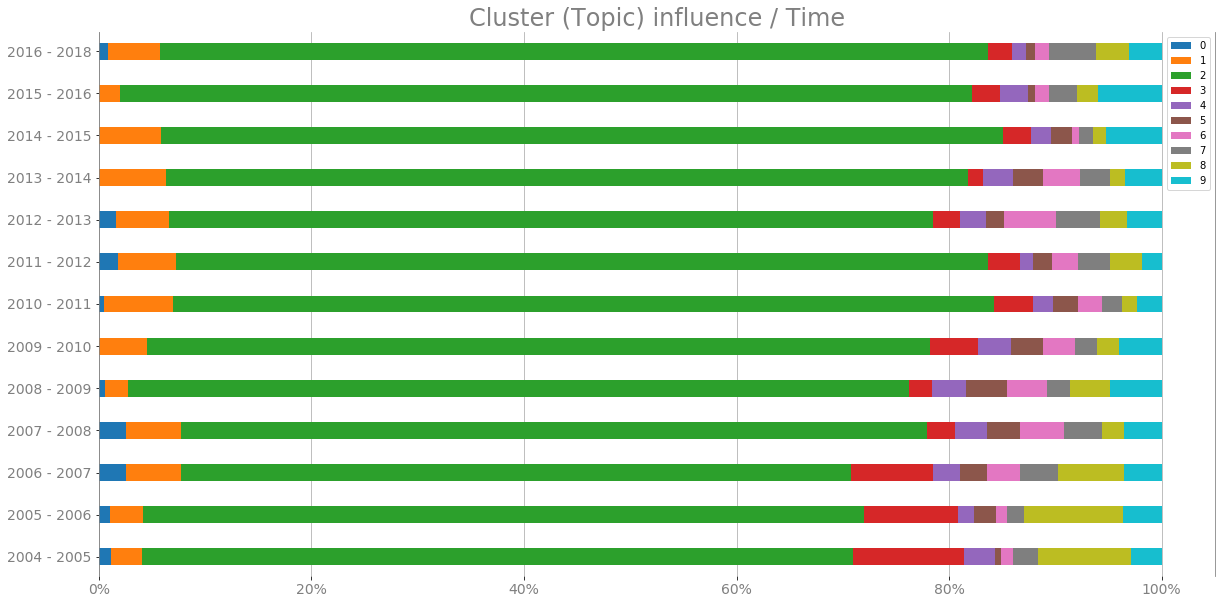

In [31]:
from matplotlib.ticker import FuncFormatter

# To percent
df_label_count_sampled_year = df_label_count_sampled_year.apply(lambda x: x / x.sum(), axis=1)

# Plot
df_label_count_sampled_year.plot.barh(stacked=True, figsize=(20, 10), width=0.4)
plt.title('Cluster (Topic) influence / Time', fontsize= 24, color='gray')

## PlotSwagg ##
plt.yticks(fontsize=14, rotation=0, color='gray')
plt.xticks(fontsize=14, rotation=0, color='gray')

# Cleanest Percent
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

# Less border
plt.gca().xaxis.grid(True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_edgecolor('gray')
plt.gca().spines['right'].set_edgecolor('gray')

# Percent line under the barH
plt.gca().set_axisbelow(True)

display(testing)
plt.show()

In [28]:
# BIG Dump :poop:
if False:
    lda_model.save('LDA_model.gensim')
    id2word.save('dictionary.gensim')
    import pickle
    pickle.dump(bow_corpus, open('corpus.pkl', 'wb'))